In [1]:
import pandas as pd
import sklearn

INPUT_path = '~/data/knock_100/csvdata/3/'
INPUT_csv01 = 'use_log.csv'
INPUT_csv02 = 'customer_master.csv'
INPUT_csv03 = 'class_master.csv'
INPUT_csv04 =  'campaign_master.csv'

In [2]:
uselog = pd.read_csv(INPUT_path+INPUT_csv01)
customer = pd.read_csv(INPUT_path+INPUT_csv02)
class_master = pd.read_csv(INPUT_path+INPUT_csv03)
campaign_master = pd.read_csv(INPUT_path+INPUT_csv04)

In [3]:
print(uselog.head())
print(customer.head())
print(class_master.head())
print(campaign_master.head())

            log_id customer_id     usedate
0  L00000049012330    AS009373  2018-04-01
1  L00000049012331    AS015315  2018-04-01
2  L00000049012332    AS040841  2018-04-01
3  L00000049012333    AS046594  2018-04-01
4  L00000049012334    AS073285  2018-04-01
  customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted  
0           0  
1           0  
2           0  
3           0  
4           0  
  class class_name  price
0   C01     オールタイム  10500
1   C02      デイタイム   7500
2   C03        ナイト   6000
  campaign_id campaign_name
0         CA1            通常
1         C

In [4]:
customer_join = pd.merge(customer, class_master, left_on='class', right_on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, left_on='campaign_id', right_on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [5]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [6]:
print(customer_join.groupby('campaign_id').count()['customer_id'])
print(customer_join.groupby('class').count()['customer_id'])
print(customer_join.groupby('gender').count()['customer_id'])
print(customer_join.groupby('is_deleted').count()['customer_id'])

campaign_id
CA1    3050
CA2     650
CA3     492
Name: customer_id, dtype: int64
class
C01    2045
C02    1019
C03    1128
Name: customer_id, dtype: int64
gender
F    1983
M    2209
Name: customer_id, dtype: int64
is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64


In [7]:
# search starting day of CA3 customer
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['campaign_id']=='CA3']['start_date']
print(f'CA3 num: {len(customer_start)}')
customer_start

CA3 num: 492


2336   2017-12-01
2337   2017-12-01
2338   2017-12-01
2339   2017-12-01
2340   2017-12-01
          ...    
3958   2018-12-15
3959   2018-12-15
3960   2018-12-15
3961   2018-12-15
3962   2018-12-15
Name: start_date, Length: 492, dtype: datetime64[ns]

In [8]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [9]:
print(customer_newer.groupby('class').count()['customer_id'])
print(customer_newer.groupby('gender').count()['customer_id'])
print(customer_newer.groupby('campaign_id').count()['customer_id'])

class
C01    1444
C02     696
C03     813
Name: customer_id, dtype: int64
gender
F    1400
M    1553
Name: customer_id, dtype: int64
campaign_id
CA1    2400
CA2     311
CA3     242
Name: customer_id, dtype: int64


In [10]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['年月','customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [11]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [12]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()[['customer_id', '年月', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [13]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [14]:
customer_join = pd.merge(customer_join, uselog_customer, left_on='customer_id', right_on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], left_on='customer_id', right_on='customer_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0


In [18]:
from dateutil.relativedelta import relativedelta
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months

customer_join

/home/sato.mizuki/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常,11.000000,11.0,11,11,0,2019-04-30,1


In [19]:
customer_join[['mean', 'median', 'min', 'max']].describe()

,mean,median,min,max
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,3.041269,7.823950
std,1.777533,1.874874,1.951565,2.168959
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,2.000000,7.000000
50%,5.000000,5.000000,3.000000,8.000000
75%,6.416667,6.500000,4.000000,9.000000
max,12.000000,12.000000,12.000000,14.000000


In [20]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

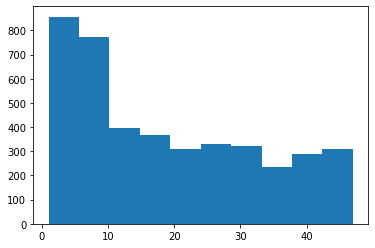

In [25]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.hist(customer_join['membership_period'])

In [26]:
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [27]:
customer_stay = customer_join.loc[customer_join['is_deleted']==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [28]:
OUTPUT_path = 'output/21to30/'
os.makedirs(OUTPUT_path, exist_ok=True)
customer_join.to_csv(OUTPUT_path+'customer_join.csv', index=False)